In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore') 

In [2]:
# import the file as a pandas DF
main_file = pd.read_csv('marketing_customer_analysis.csv')
main_file

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
# to display the dataframe main_file info
main_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
#showing data frame column types (which we kindda did with info())
main_file.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [5]:
# to display the dataframe main_file shape
main_file.shape

(9134, 24)

In [6]:
#viewing the headers for main_file
main_file.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
##Label of each column
main_file.columns.values

array(['Customer', 'State', 'Customer Lifetime Value', 'Response',
       'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus',
       'Gender', 'Income', 'Location Code', 'Marital Status',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class',
       'Vehicle Size'], dtype=object)

In [8]:
main_file.describe() 

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
#making sure the columns are in lower case and replacing the space with underline
main_file.columns = main_file.columns.str.lower().str.replace(" ","_")
main_file.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [10]:
# Customer is the id, unique, so I passed it as the index
main_file = main_file.set_index('customer')

In [11]:
main_file.head

<bound method NDFrame.head of                state  customer_lifetime_value response  coverage education  \
customer                                                                     
BU79786   Washington              2763.519279       No     Basic  Bachelor   
QZ44356      Arizona              6979.535903       No  Extended  Bachelor   
AI49188       Nevada             12887.431650       No   Premium  Bachelor   
WW63253   California              7645.861827       No     Basic  Bachelor   
HB64268   Washington              2813.692575       No     Basic  Bachelor   
...              ...                      ...      ...       ...       ...   
LA72316   California             23405.987980       No     Basic  Bachelor   
PK87824   California              3096.511217      Yes  Extended   College   
TD14365   California              8163.890428       No  Extended  Bachelor   
UP19263   California              7524.442436       No  Extended   College   
Y167826   California              

In [12]:
#total_claim_amount is the dependent variable
main_file.total_claim_amount.unique() 

array([ 384.811147, 1131.464935,  566.472247, ...,  541.282007,
        198.234764,  790.784983])

In [13]:
#listing categorical columns
list_categorical_types = list(main_file.select_dtypes(include=['object']).columns)
list_categorical_types

['state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [14]:
#listing categorical columns count
len(list_categorical_types)

15

In [15]:
#listing numerical columns
list_numeric_types = list(main_file.select_dtypes(include=['float64','int64']).columns)
list_numeric_types

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [16]:
#listing categorical columns
len(list_numeric_types)

8

In [17]:
#checking again what we got after data cleanup
main_file.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [18]:
#checking the percentage of null values
main_file.isna().sum()/len(main_file)*100

state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [19]:
main_file1 = main_file.copy()

In [20]:
# check my categories in each categorical column
cat = main_file1.select_dtypes('object')
cat

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


In [21]:
# I see that some need parametrization (making it all with standard values)
for column in cat.columns:
    print(column, cat[column].unique())

state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response ['No' 'Yes']
coverage ['Basic' 'Extended' 'Premium']
education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
effective_to_date ['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
employmentstatus ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender ['F' 'M']
location_code ['Suburban' 'Rural' 'Urban']
marital_status ['Married' 'Single' 'Divorced']
policy_type ['C

In [22]:
#converting 'effective_to_date' to date-time
main_file['effective_to_date']=pd.to_datetime(main_file['effective_to_date'], errors='coerce')
main_file['effective_to_date']

customer
BU79786   2011-02-24
QZ44356   2011-01-31
AI49188   2011-02-19
WW63253   2011-01-20
HB64268   2011-02-03
             ...    
LA72316   2011-02-10
PK87824   2011-02-12
TD14365   2011-02-06
UP19263   2011-02-03
Y167826   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [23]:
# creating new 'months' column and populating it with the months in the'effective_to_date' column
main_file['months'] = pd.DatetimeIndex(main_file['effective_to_date']).month
main_file['months']

customer
BU79786    2
QZ44356    1
AI49188    2
WW63253    1
HB64268    2
          ..
LA72316    2
PK87824    2
TD14365    2
UP19263    2
Y167826    2
Name: months, Length: 9134, dtype: int64

In [24]:
#filtering by first quarter and storing the filer in a data frame
first_quarter = main_file[main_file['months'] < 4]
first_quarter

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,months
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2


In [25]:
main_file1.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [26]:
#simplifying the states column
main_file1['state'] = main_file1['state'].apply(lambda x: 'CA' if str(x).lower().startswith('cali')
                                                 else 'NV' if x == 'Nevada'
                                                 else 'AZ' if x == 'Arizona'
                                                 else 'OR' if x == 'Oregon'
                                                 else 'WA' if x == 'Washington'
                                                 else x)
main_file1.state.value_counts()

CA    3150
OR    2601
AZ    1703
NV     882
WA     798
Name: state, dtype: int64

In [27]:
main_file1.describe().apply(lambda x: round(x,2)) # a lambda just to round it pretty

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00
mean,8004.94,37657.38,93.22,15.10,48.06,0.38,2.97,434.09
std,6870.97,30379.90,34.41,10.07,27.91,0.91,2.39,290.50
min,1898.01,0.00,61.00,0.00,0.00,0.00,1.00,0.10
25%,3994.25,0.00,68.00,6.00,24.00,0.00,1.00,272.26
50%,5780.18,33889.50,83.00,14.00,48.00,0.00,2.00,383.95
75%,8962.17,62320.00,109.00,23.00,71.00,0.00,4.00,547.51
max,83325.38,99981.00,298.00,35.00,99.00,5.00,9.00,2893.24


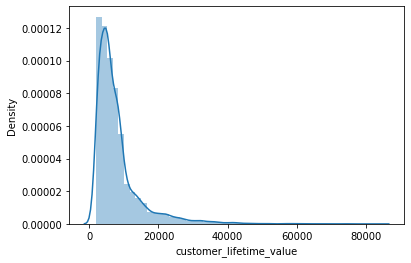

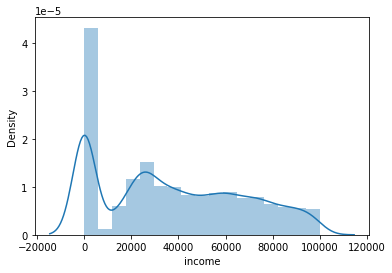

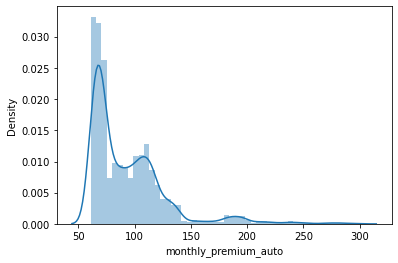

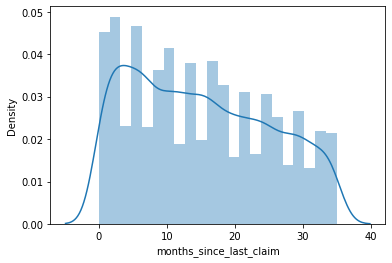

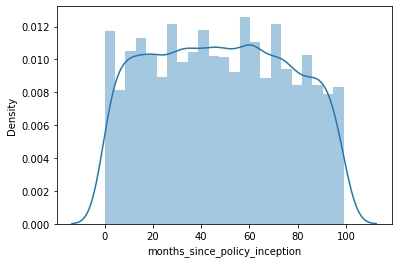

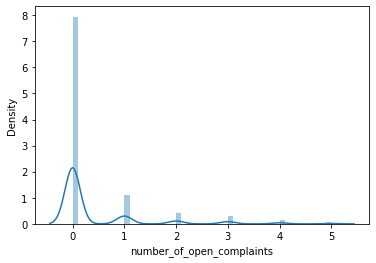

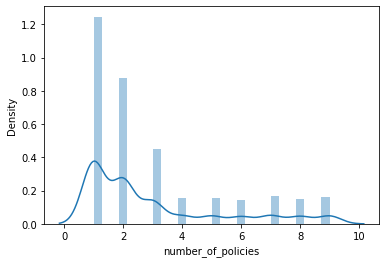

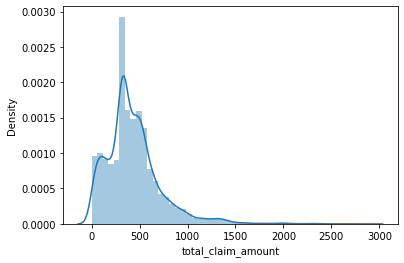

In [28]:
for column in main_file1.select_dtypes(np.number).columns:
    sns.distplot(main_file1[column])
    plt.show()

In [29]:
numericals = main_file.select_dtypes(include=['float64','int64'])
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,months
customer,,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147,2
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935,1
AI49188,12887.431650,48767,108,18,38,0,2,566.472247,2
WW63253,7645.861827,0,106,18,65,0,7,529.881344,1
HB64268,2813.692575,43836,73,12,44,0,1,138.130879,2


In [30]:
categoricals = main_file.select_dtypes(include=['object'])
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [31]:
# check the correlations
numericals_corr = numericals.corr()
numericals_corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,months
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.006096
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.000169
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.011467
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.020921
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.011010
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.006335
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,0.009305
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.006820
months,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,0.006820,1.000000


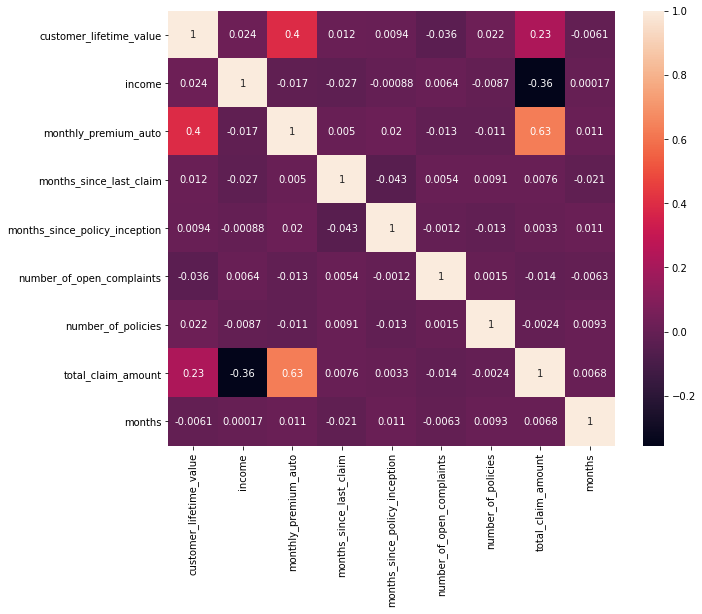

In [32]:
# check the correlations
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(numericals_corr, xticklabels=numericals_corr.columns,yticklabels=numericals_corr.columns, annot = True)

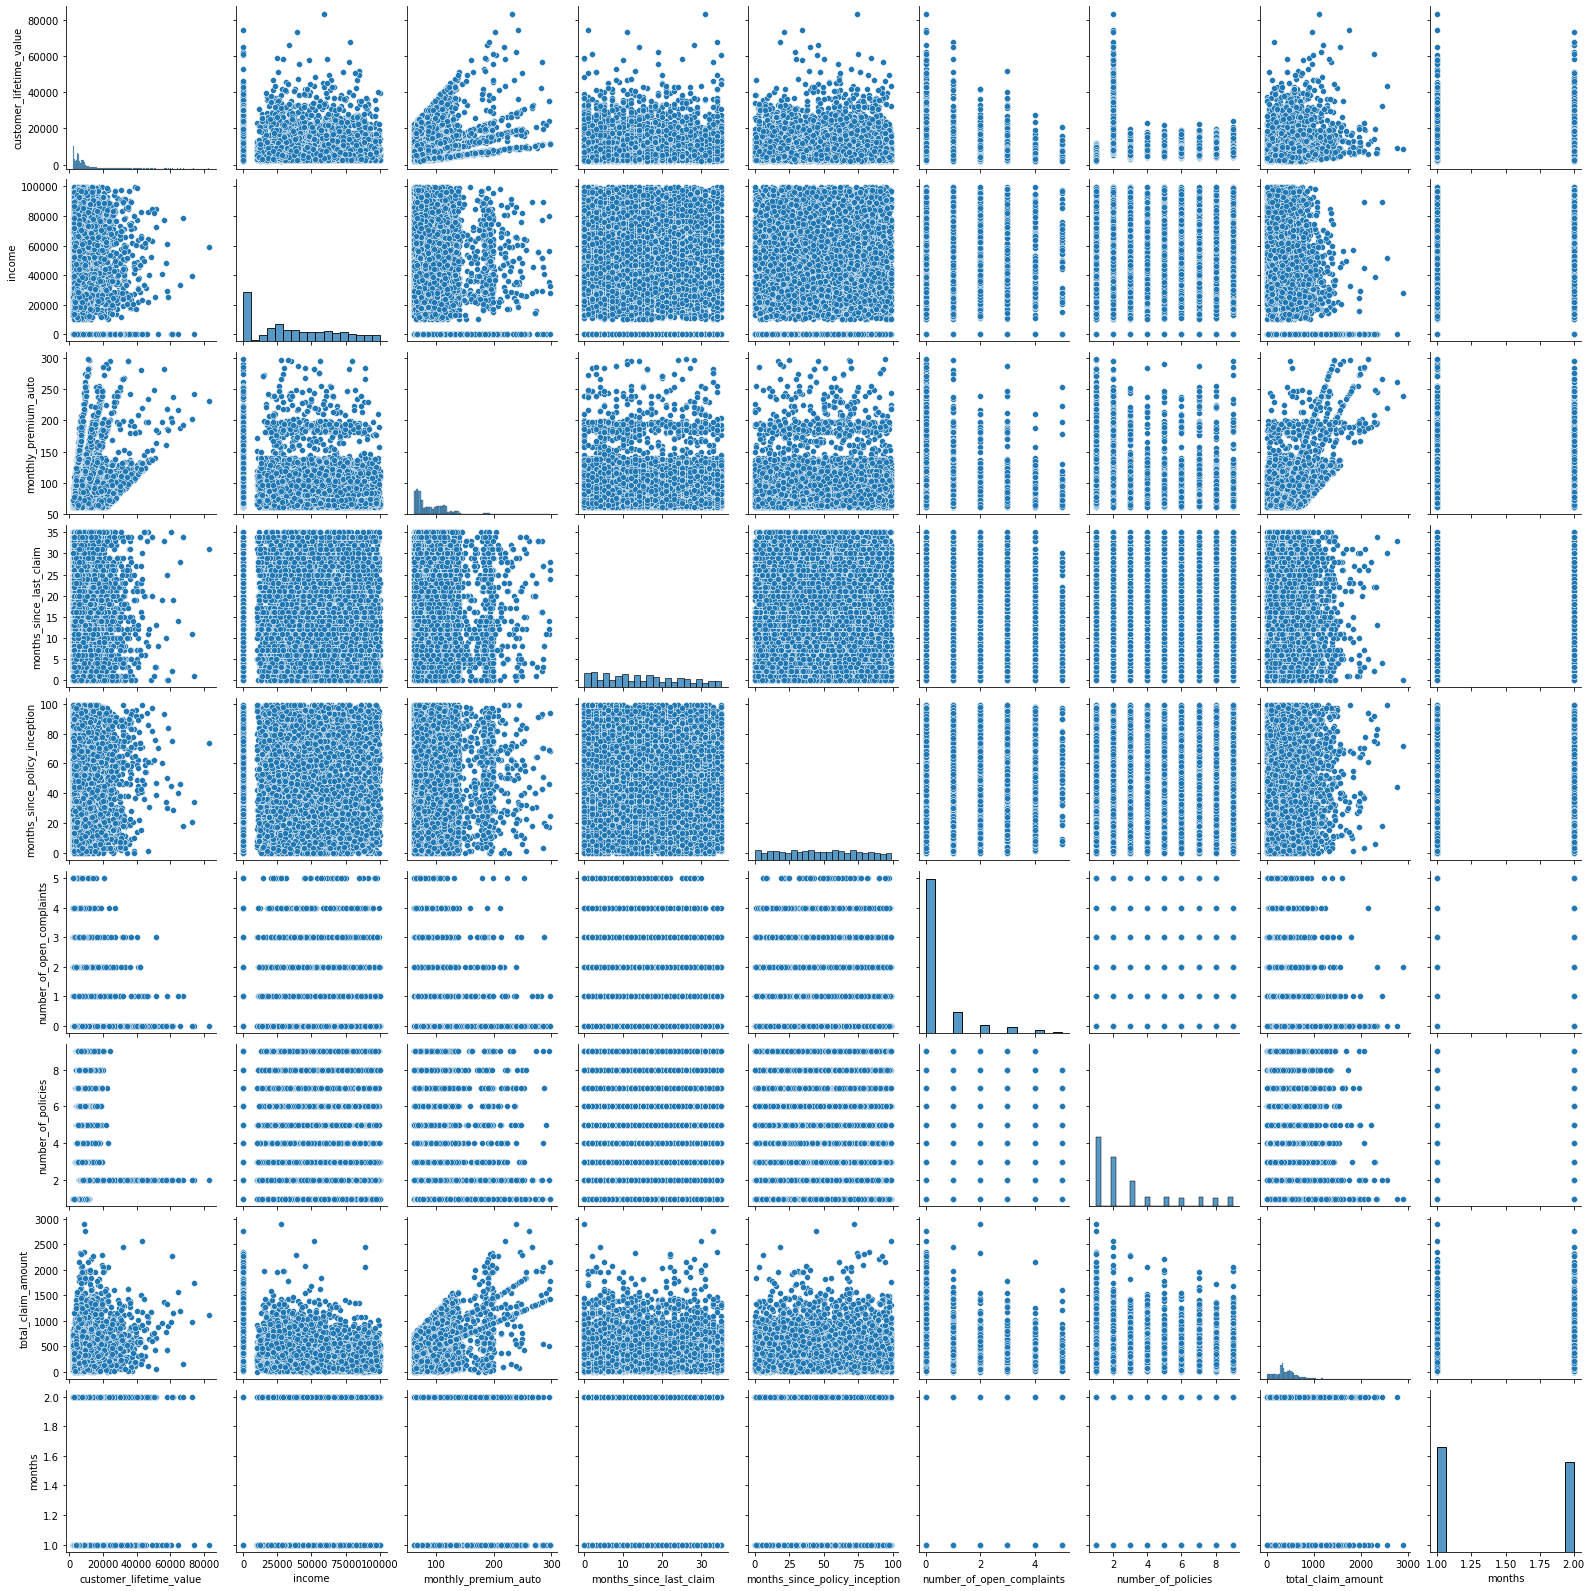

In [33]:
# covariance visualization
sns.pairplot(numericals)

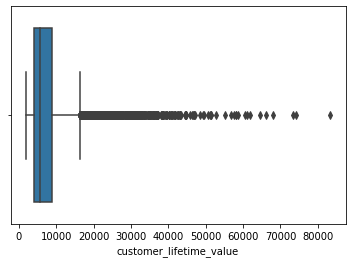

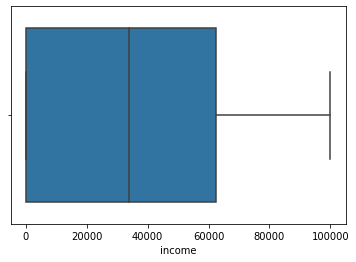

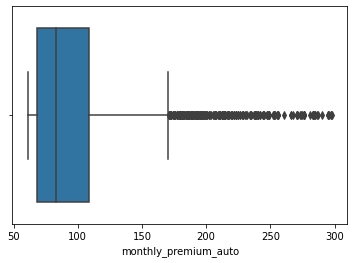

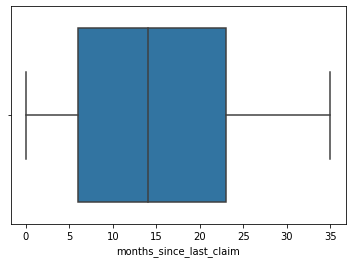

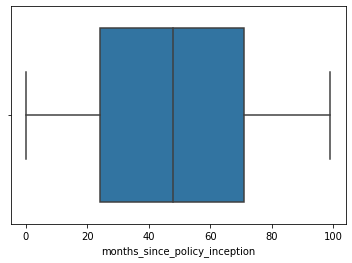

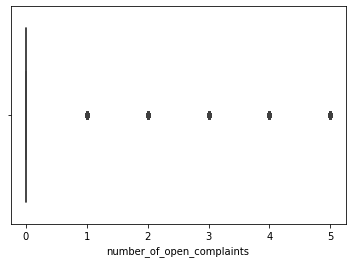

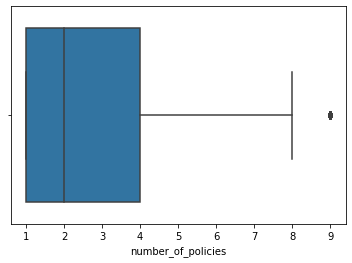

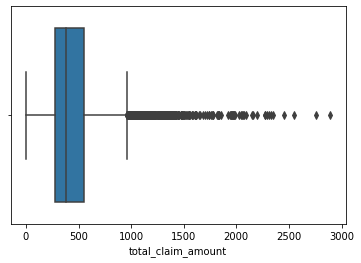

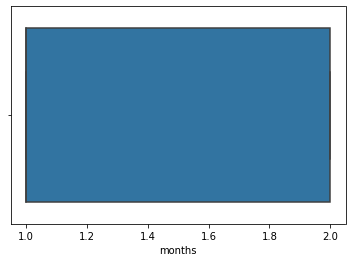

In [34]:
for column in numericals.columns:
    sns.boxplot(x = numericals[column])
    plt.show()

In [35]:
numericals1 = numericals.copy()
numericals1.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,months
customer,,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147,2
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935,1
AI49188,12887.431650,48767,108,18,38,0,2,566.472247,2
WW63253,7645.861827,0,106,18,65,0,7,529.881344,1
HB64268,2813.692575,43836,73,12,44,0,1,138.130879,2


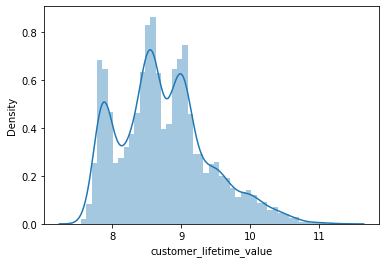

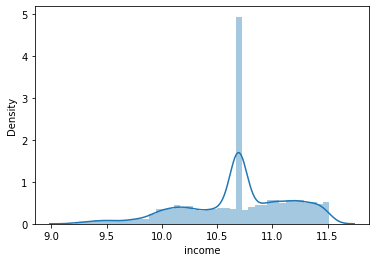

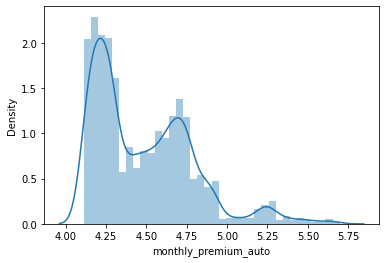

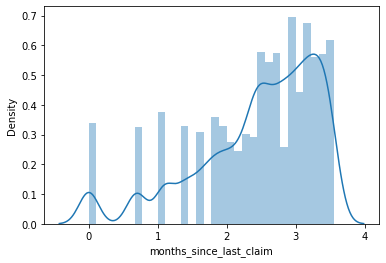

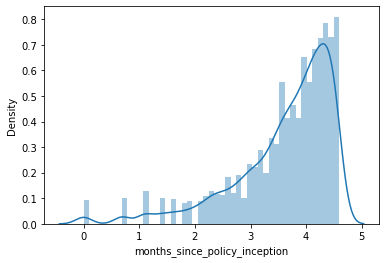

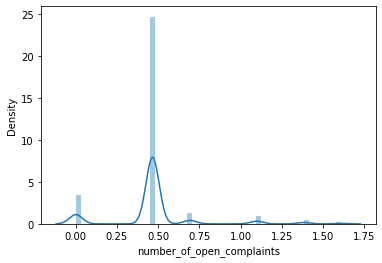

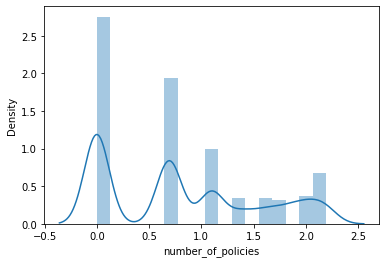

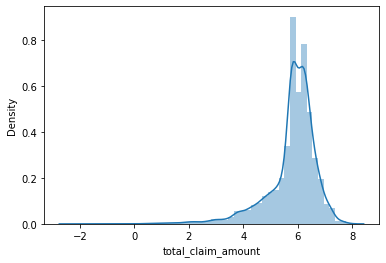

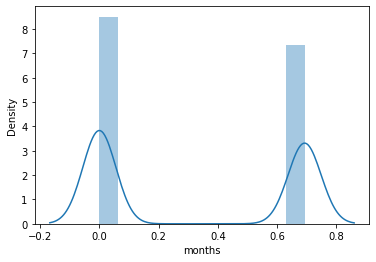

In [36]:
for column in numericals1.columns:
    log_lmbda = lambda x: np.log(x) if np.isfinite(np.log(x)) else np.NAN
    numericals1[column] = numericals1[column].apply(log_lmbda)
    numericals1[column] = numericals1[column].fillna(np.mean(numericals1[column]))
    sns.distplot(numericals1[column])
    plt.show()

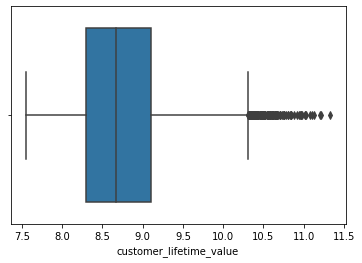

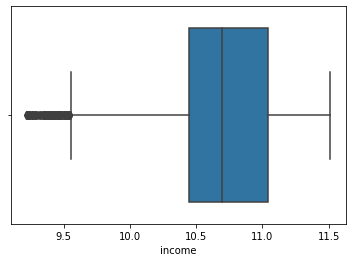

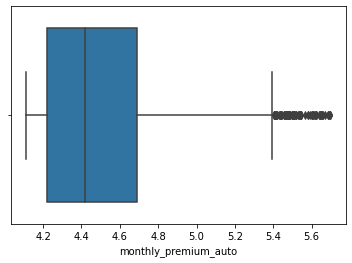

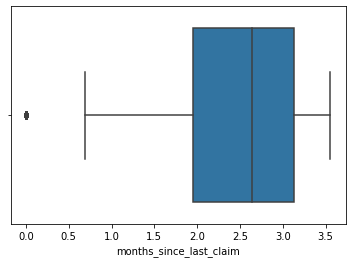

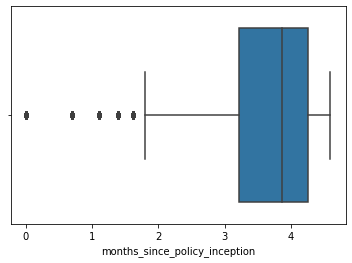

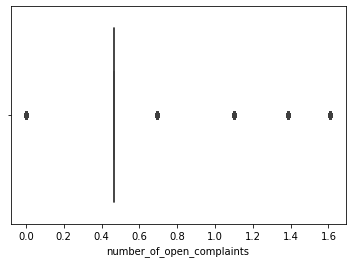

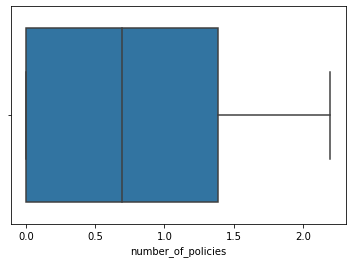

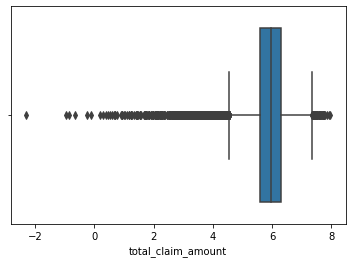

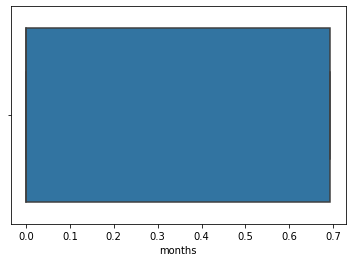

In [37]:
for column in numericals1.columns:
    sns.boxplot(x = numericals1[column])
    plt.show()

In [38]:
def remove_outliers(main_file1, threshold=1.5, in_columns=main_file1.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(main_file1[column],75)
            lower = np.percentile(main_file1[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            main_file1 = main_file1[(main_file1[column]>lower_limit) & (main_file1[column]<upper_limit)]
    return main_file1

In [39]:
main_file_v1 = main_file1.copy()

In [40]:
numericals2 = main_file_v1.select_dtypes(include=['float64','int64'])
numericals2.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879


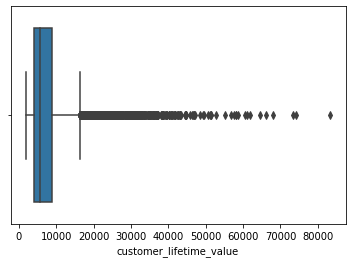

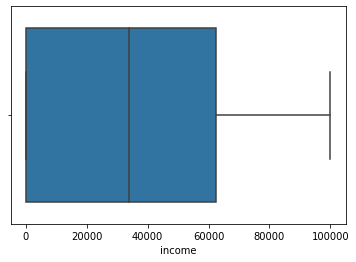

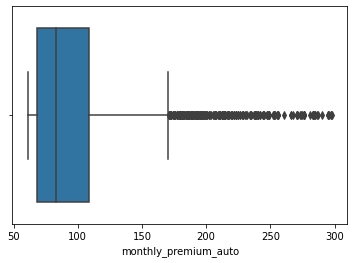

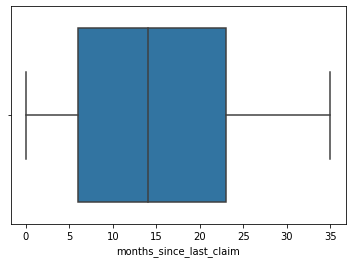

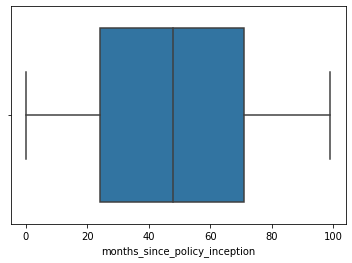

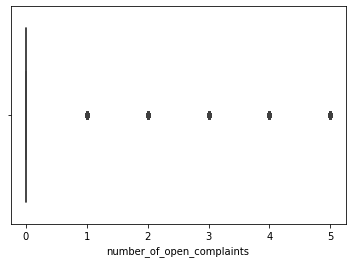

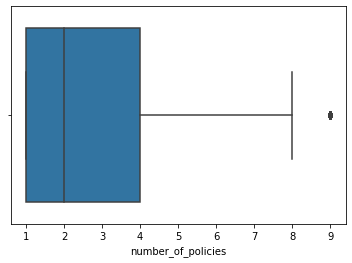

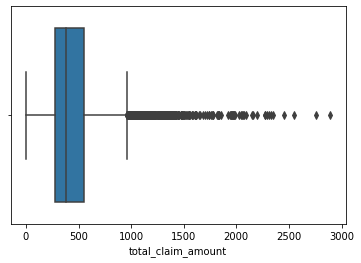

In [41]:
for column in numericals2.columns:
    sns.boxplot(x = numericals2[column])
    plt.show()

In [42]:
main_file_v1_2 = remove_outliers(main_file_v1, threshold=1.5, in_columns=['customer_lifetime_value', 'monthly_premium_auto', 'total_claim_amount'])

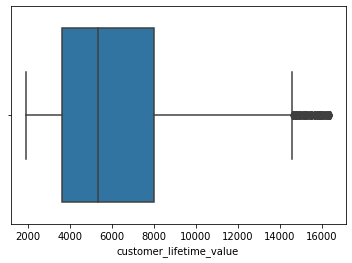

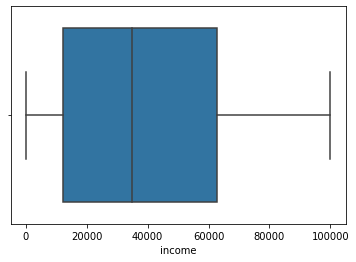

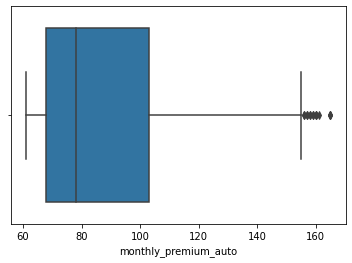

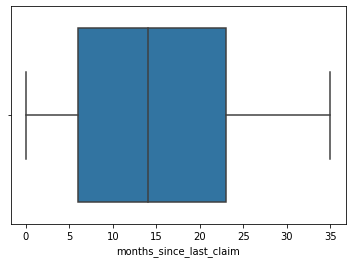

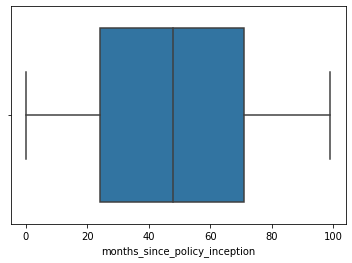

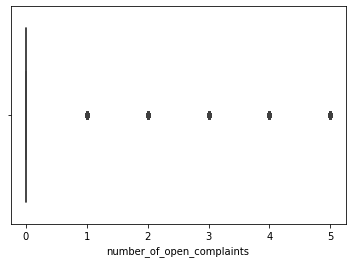

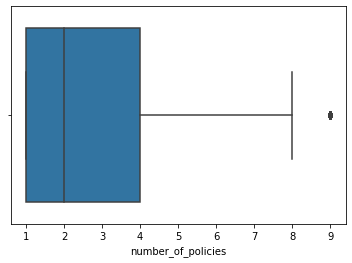

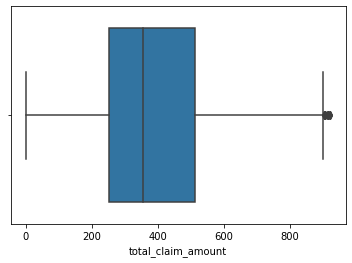

In [43]:
numericals3 = main_file_v1_2.select_dtypes(include=['float64','int64'])
for column in numericals3.columns:
    sns.boxplot(x = numericals3[column])
    plt.show()

In [44]:
main_file_v2 = main_file_v1_2.copy()

In [45]:
numericals4 = main_file_v1_2.select_dtypes(include=['float64','int64'])
numericals4.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [46]:
np.isinf(numericals4)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,False,False,False,False,False,False,False,False
AI49188,False,False,False,False,False,False,False,False
WW63253,False,False,False,False,False,False,False,False
HB64268,False,False,False,False,False,False,False,False
OC83172,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
YM19146,False,False,False,False,False,False,False,False
PK87824,False,False,False,False,False,False,False,False
TD14365,False,False,False,False,False,False,False,False


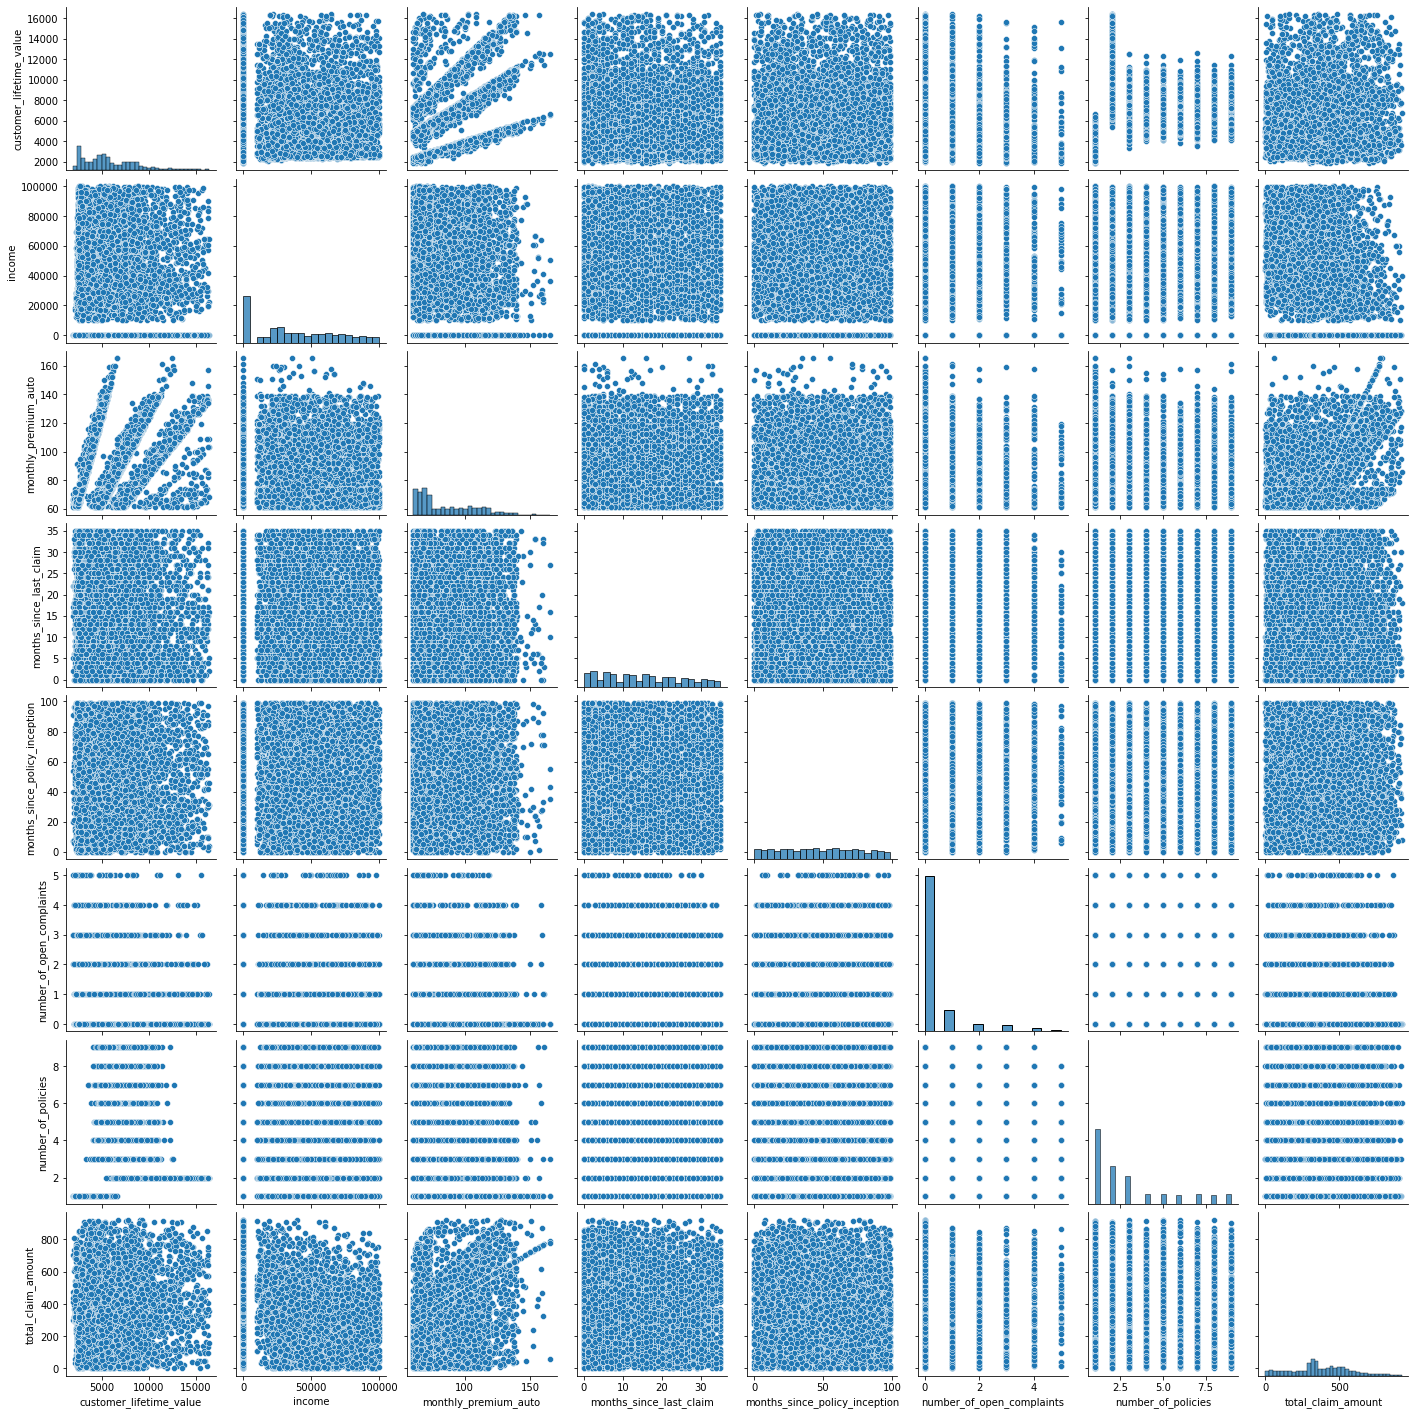

In [47]:
# covariance visualization
sns.pairplot(numericals4)

In [48]:
main_file_v2 = pd.get_dummies(main_file_v2, drop_first=True)
main_file_v2

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_CA,state_NV,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147,0,0,...,0,0,0,0,0,0,0,1,1,0
AI49188,12887.431650,48767,108,18,38,0,2,566.472247,0,1,...,0,0,0,0,0,0,0,1,1,0
WW63253,7645.861827,0,106,18,65,0,7,529.881344,1,0,...,0,0,0,1,0,1,0,0,1,0
HB64268,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,0,0,0,0,0,0,0,0,1,0
OC83172,8256.297800,62902,69,14,94,0,2,159.383042,0,0,...,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YM19146,4100.398533,47761,104,16,58,0,1,541.282007,1,0,...,0,0,1,0,0,0,0,0,0,0
PK87824,3096.511217,21604,79,14,28,0,1,379.200000,1,0,...,0,0,1,0,0,0,0,0,1,0
TD14365,8163.890428,0,85,9,37,3,2,790.784983,1,0,...,0,0,1,0,0,0,0,0,1,0


In [49]:
#X = numericals4.drop('total_claim_amount', axis=1)
#X = main_file_v2.drop(columns =['total_claim_amount', 'effective_to_date'], axis=1)
X = main_file_v2.drop('total_claim_amount', axis=1)
y = main_file_v2['total_claim_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
predictions = model.predict(X_test)

In [52]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.7748914724271715, 72.77809213727778, 95.38030359445307)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
##encoder = OneHotEncoder(handle_unknown='error', drop='first')
#encoder.fit(X_cat)

In [55]:
##encoded = encoder.transform(X_cat).toarray()
#encoded

In [56]:
#train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
#model = LinearRegression()
#model.fit(X_train,y_train)

#predictions  = model.predict(X_test)

In [58]:
#r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

In [59]:
#trying another aproach
main_file_v3 = main_file_v1_2.copy()

In [60]:
def boxcox_transform(main_file_v3):
    numeric_cols = main_file_v3.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        main_file_v3[column] = np.where(main_file_v3[column]<=0, np.NAN, main_file_v3[column]) 
        main_file_v3[column] = main_file_v3[column].fillna(main_file_v3[column].mean())
        transformed_data, ci = stats.boxcox(main_file_v3[column])
        main_file_v3[column] = transformed_data
        _ci[column] = ci
    return main_file_v3, _ci

In [61]:
main_file_v3, _ci = boxcox_transform(main_file_v3)
_ci

{'customer_lifetime_value': -0.04302013398906841,
 'income': 0.600747220512583,
 'monthly_premium_auto': -1.3810653984798533,
 'months_since_last_claim': 0.565091342144182,
 'months_since_policy_inception': 0.7123858078069685,
 'number_of_open_complaints': 0.1619052562067086,
 'number_of_policies': -0.3631594343441322,
 'total_claim_amount': 0.7489780195109784}

In [62]:
def remove_outliers(main_file_v3, threshold=1.5, in_columns=main_file_v3.select_dtypes(np.number).columns, skip_columns=['number_of_open_complaints','number_of_policies']):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(main_file_v3[column],75)
            lower = np.percentile(main_file_v3[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            main_file_v3 = main_file_v3[(main_file_v3[column]>lower_limit) & (main_file_v3[column]<upper_limit)]
    return main_file_v3

In [63]:
main_file_v3 = remove_outliers(main_file_v3, threshold=1.5)
main_file_v3.head

<bound method NDFrame.head of          state  customer_lifetime_value response  coverage education  \
customer                                                               
BU79786     WA                 6.714808       No     Basic  Bachelor   
AI49188     NV                 7.774288       No   Premium  Bachelor   
WW63253     CA                 7.422881       No     Basic  Bachelor   
HB64268     WA                 6.727598       No     Basic  Bachelor   
OC83172     OR                 7.475078      Yes     Basic  Bachelor   
...        ...                      ...      ...       ...       ...   
YM19146     CA                 6.993036       No   Premium   College   
PK87824     CA                 6.795516      Yes  Extended   College   
TD14365     CA                 7.467440       No  Extended  Bachelor   
UP19263     CA                 7.411982       No  Extended   College   
Y167826     CA                 6.674615       No  Extended   College   

         effective_to_date employ

In [64]:
main_file_v3 = pd.get_dummies(main_file_v3, drop_first=True)

In [65]:
X = main_file_v3.drop('total_claim_amount', axis=1)
y = main_file_v3['total_claim_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [67]:
predictions = model.predict(X_test)

In [68]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.8018639795937599, 16.46732615957666, 21.038247571437807)